# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf 

# Importing Deep Learning Libraries

from  tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2023-03-23 09:08:11.808414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 09:08:12.295685: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-23 09:08:14.158040: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2023-03-23 09:08:14.158198: W tensorflow/co

In [2]:
import os

def number_images(folder_path):
    # Get a list of all the images in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    # Sort the list of images
    image_files.sort()

    # Number the images serially starting from 1
    for i, image_file in enumerate(image_files, start=1):
        # Construct the new file name
        new_file_name = f'{i}.jpg'  # The file name will be in the format "1.jpg", "2.jpg", etc.

        # Construct the old and new file paths
        old_file_path = os.path.join(folder_path, image_file)
        new_file_path = os.path.join(folder_path, new_file_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

In [3]:
number_images("Dataset/All/Neutral")

In [13]:
import os
import random
import shutil

# Set the source folder path containing the images
src_folder = 'Dataset/All/Surprise'

# Set the destination folder paths for the three splits
split1_folder = 'Dataset/train/Surprise'
split2_folder = 'Dataset/validation/Surprise'
split3_folder = 'Dataset/test'

# Set the percentage splits for the data
split1_percent = 0.8
split2_percent = 0.1
split3_percent = 0.1

# Get a list of all the image files in the source folder
img_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]

# Shuffle the image files randomly
random.shuffle(img_files)

# Calculate the number of images for each split
total_imgs = len(img_files)
split1_count = int(total_imgs * split1_percent)
split2_count = int(total_imgs * split2_percent)
split3_count = total_imgs - split1_count - split2_count

# Copy the images to each split folder
for i, img_file in enumerate(img_files):
    if i < split1_count:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split1_folder, img_file))
    elif i < split1_count + split2_count:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split2_folder, img_file))
    else:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split3_folder, img_file))

In [4]:
def rename_images_in_folder(folder_path):
    folder_name = os.path.basename(folder_path)
    images = os.listdir(folder_path)
    for i, image in enumerate(images):
        old_path = os.path.join(folder_path, image)
        new_name = "{}_{}.jpg".format(folder_name, i+1)
        new_path = os.path.join(folder_path, new_name)
        os.rename(old_path, new_path)

In [5]:
rename_images_in_folder("Dataset/All/Neutral")

In [ ]:
emotions = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
for i in emotions:
    rename_images_in_folder("Author's_Kids_Dataset/Inception/test/" + i)

# Displaying Images

In [14]:
picture_size = 100
folder_path = "Dataset/"

# Making Training and Validation Data

In [15]:
batch_size  = 16

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1584 images belonging to 7 classes.
Found 198 images belonging to 7 classes.


# Model Building

In [16]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Create the InceptionResNetV2 model
input_shape = (100, 100, 3)
base_model = InceptionResNetV2(include_top=False, weights= None, input_shape=input_shape)

# Flatten the output of the InceptionResNetV2 model
flatten = Flatten()(base_model.output)

# Add a dense layer with 7 units and a softmax activation function
dense = Dense(7, activation='softmax')(flatten)

# Create the final model
model = Model(inputs=base_model.input, outputs=dense)

# Compile the model with the specified parameters
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

2023-03-23 09:17:58.633400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:17:58.777308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:17:58.777385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:17:58.780875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

# Fitting the Model with Training and Validation Data 

In [17]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              #optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                #callbacks=callbacks_list
                                )

/tmp/ipykernel_75/2350914230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/10
99/99 [==============================] - 29s 290ms/step - loss: 0.3586 - accuracy: 0.8870 - val_loss: 0.5153 - val_accuracy: 0.8385
Epoch 2/10
99/99 [==============================] - 32s 318ms/step - loss: 0.3410 - accuracy: 0.9072 - val_loss: 0.5442 - val_accuracy: 0.8229
Epoch 3/10
99/99 [==============================] - 28s 283ms/step - loss: 0.3215 - accuracy: 0.9072 - val_loss: 1.4131 - val_accuracy: 0.6979
Epoch 4/10
99/99 [==============================] - 30s 296ms/step - loss: 0.2504 - accuracy: 0.9274 - val_loss: 1.6394 - val_accuracy: 0.6823
Epoch 5/10
99/99 [==============================] - 30s 299ms/step - loss: 0.3021 - accuracy: 0.9280 - val_loss: 0.5469 - val_accuracy: 0.8490
Epoch 6/10
99/99 [==============================] - 30s 303ms/step - loss: 0.2269 - accuracy: 0.9438 - val_loss: 2.7837 - val_accuracy: 0.7240
Epoch 7/10
99/99 [==============================] - 28s 281ms/step - loss: 0.2827 - accuracy: 0.9242 - val_loss: 1.7554 - val_accuracy: 0.7292

# Plotting Accuracy & Loss

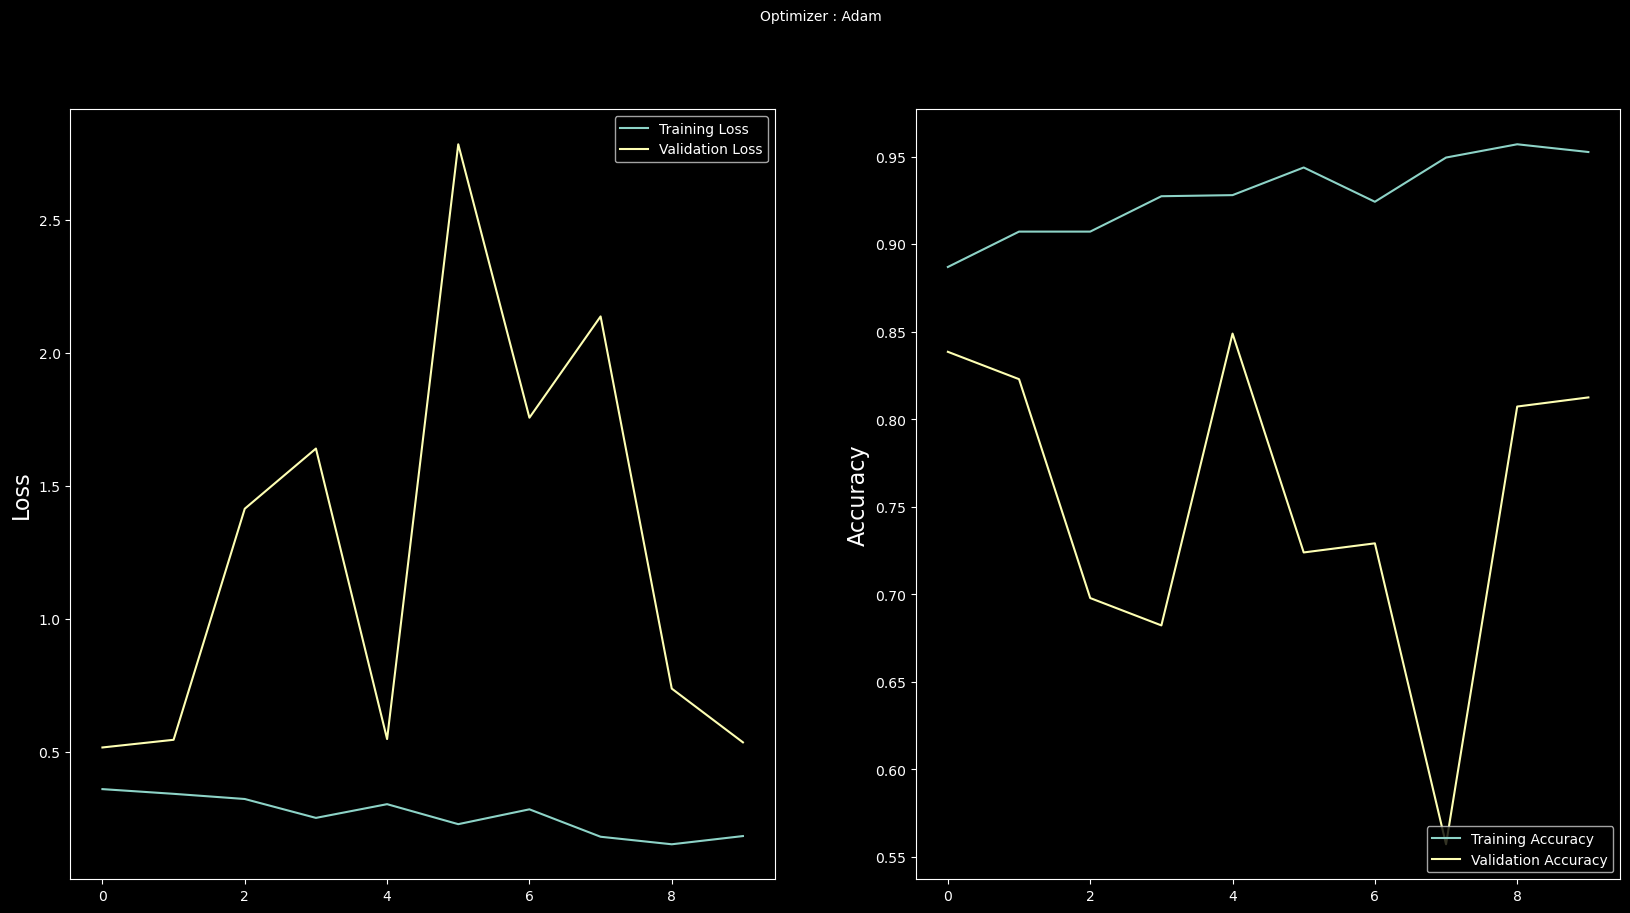

In [20]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def make_predictions(folder_path, model):
    emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    predictions = []
    num_correct = 0
    total_num = 0
   
    for file_name in os.listdir(folder_path):
        if not file_name.endswith('.jpg'):
            continue
       
        # Split the filename into the emotion label and the index
        label, index = file_name.split('_')
        index = int(index.split('.')[0])
       
        img_path = os.path.join(folder_path, file_name)
        img = load_img(img_path)
        img = tf.image.resize(img, (100, 100))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
       
        prediction = model.predict(img)
        predicted_label = emotion_labels[prediction.argmax()]
        predictions.append((file_name, predicted_label))
       
        if predicted_label == label:
            num_correct += 1
       
        total_num += 1
   
    accuracy = num_correct / total_num
    return predictions, accuracy

In [22]:
folder_path = "Dataset/test"
model = model
predictions, accuracy = make_predictions(folder_path, model)
print("Accuracy: {:.2%}".format(accuracy))
print(predictions)

1/1 [==============================] - 0s 83ms/step
Accuracy: 79.29%
[('Anger_11.jpg', 'Anger'), ('Anger_132.jpg', 'Anger'), ('Anger_137.jpg', 'Anger'), ('Anger_139.jpg', 'Anger'), ('Anger_167.jpg', 'Anger'), ('Anger_173.jpg', 'Anger'), ('Anger_180.jpg', 'Sad'), ('Anger_195.jpg', 'Anger'), ('Anger_2.jpg', 'Anger'), ('Anger_204.jpg', 'Anger'), ('Anger_221.jpg', 'Anger'), ('Anger_224.jpg', 'Anger'), ('Anger_227.jpg', 'Anger'), ('Anger_231.jpg', 'Anger'), ('Anger_232.jpg', 'Anger'), ('Anger_238.jpg', 'Anger'), ('Anger_261.jpg', 'Anger'), ('Anger_27.jpg', 'Anger'), ('Anger_278.jpg', 'Anger'), ('Anger_28.jpg', 'Anger'), ('Anger_285.jpg', 'Anger'), ('Anger_286.jpg', 'Anger'), ('Anger_297.jpg', 'Anger'), ('Anger_49.jpg', 'Anger'), ('Anger_6.jpg', 'Anger'), ('Anger_60.jpg', 'Disgust'), ('Anger_77.jpg', 'Anger'), ('Anger_8.jpg', 'Anger'), ('Anger_88.jpg', 'Anger'), ('Anger_95.jpg', 'Anger'), ('Disgust_101.jpg', 'Disgust'), ('Disgust_112.jpg', 'Disgust'), ('Disgust_16.jpg', 'Disgust'), ('Disgust

In [23]:
model.save("Jaffe_I.h5")